# Computer Graphik: Flächen - Übung

I.BA_CG, SW 10

Léonard Wyrsch

## Aufgabe 1: Zylinderkoordinaten
Beschreiben Sie mit Hilfe von Zylinderkoordinaten das rechts gezeichneten Tortenstück. Sie müssen 5 Flächen exakt mit Hilfe von Mengen aus R<sup>3</sup> beschreiben!

                     z
                     |
                    /|
            6cm /   /|  PI/6
            /      / |
         /__      /  |
        |   --__ /   |
    4cm |       |   / \
        |       |  /   \
        |__     | /     y
       /    --__|/
      x

Hinweis: der Tortenboden lässt sich durch folgende Teilmenge von R<sup>3</sup> beschreiben:

T<sub>B</sub> = { ( r, θ, 0 ) | 0 ≤ r ≤ 6 ∧ 0 ≤ θ ≤ π/6 }

    Boden:   TB  = { ( r,   θ, 0 ) | 0 ≤ r ≤ 6   ∧ 0 ≤ θ ≤ π/6 }
    Deckel:  TD  = { ( r,   θ, 4 ) | 0 ≤ r ≤ 6   ∧ 0 ≤ θ ≤ π/6 }
    Aussen:  TA  = { ( 6,   θ, z ) | 0 ≤ θ ≤ π/6 ∧ 0 ≤ z ≤ 4   }
    Seite 1: TS1 = { ( r,   0, z ) | 0 ≤ r ≤ 6   ∧ 0 ≤ z ≤ 4   }
    Seite 2: TS2 = { ( r, π/6, z ) | 0 ≤ r ≤ 6   ∧ 0 ≤ z ≤ 4   }

## Aufgabe 2: Sphärische Koordinaten
Beschreiben Sie mit Hilfe von Kugelkoordinaten den rechts gezeichneten Kegel mit Öffnungswinkel 90°. Sie müssen dazu 2 Flächen exakt mit Hilfe von Mengen aus R<sup>3</sup> beschreiben! Wie würde die Darstellung in Zylinderkoordinaten lauten?

                   z
                   |
                 __|__
        __  --     |     --  __
      /            |            \
    |              | 1/√2         |
     \\ __                   __ //
      \      --  _____  --     /
        \                    /
          \                /
            \            /
       --     \        /     --
            --  \    /  --
                 -\/-
              --      --
       x --                -- y

Hinweis: die Deckfläche ässt sich durch folgende Teilmenge von R<sup>3</sup> beschreiben:

D = { ( 1/(√2*cosφ), φ, θ ) | 0 ≤ φ ≤ π/4 ∧ 0 ≤ θ < 2π }

Kugelkoordinaten

    Decke:  D = { ( 1/(√2*cosφ),   φ, θ ) | 0 ≤ φ ≤ π/4 ∧ 0 ≤ θ < 2π }
    Mantel: M = { (           ρ, π/4, θ ) | 0 ≤ ρ ≤ 1   ∧ 0 ≤ θ < 2π }

Zylinderkoordinaten

    Decke:  D = { ( r, θ, 1/√2 ) | 0 ≤ r ≤ φ/4 ∧ 0 ≤ θ ≤ 2π }
    Mantel: M = { ( r, θ, z    ) | r = z       ∧ 0 ≤ θ ≤ 2π ∧ 0 ≤ z ≤ 1/√2 }

## Aufgabe 3: Parametrisierung einer Rotationsfläche
Gesucht ist die Parametrisierung eines Kegels mit dem Basiskreis x<sup>2</sup> + y<sup>2</sup> = a<sup>2</sup> in der xy-Ebene und der Spitze im Punkt (0, 0, h) über der xy-Ebene (siehe folgende Abbildung).

      |     |\
      |     | \
    h |     |__\
      |   | | r \
      | z | |    \
      |   | |_____\
               a

## Aufgabe 4: Regelfläche — Möbiusband
Zeige, dass das Möbiusband (siehe Abb. rechts) durch die folgende parametrische Gleichung dargestellt werden kann:

r(u, v) = p(u) + v*q(u)

wobei

p(u) = \[cos(2u), sin(2u), 0\]<sup>T</sup> und q(u) = \[cos(u) * cos(2u), cos(u) * sin(2u), sin(u)\]<sup>T</sup>

wobei (u, v) ∈ \[0, π\] × \[−1, 1\], indem Sie die Regelfläche mit einem geeigneten Zeichenprogramm darstellen.

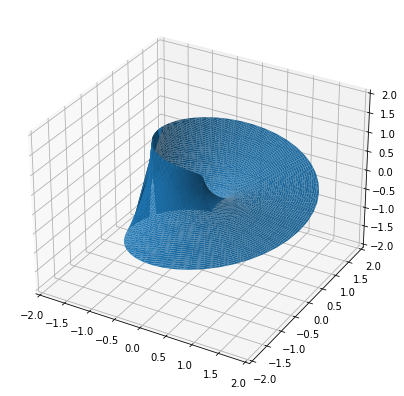

In [77]:
import math
import numpy as np
import matplotlib.pyplot as plt

def r(u, v):
    return p(u) + v * q(u)

def p(u):
    return np.array([ math.cos(2 * u), math.sin(2 * u), 0 ])

def q(u):
    cosu = math.cos(u)
    return np.array([ cosu * math.cos(2 * u), cosu * math.sin(2 * u), math.sin(u) ])

points = np.array([ r(u, v) for u in np.linspace(0, math.pi) for v in np.linspace(-1, 1) ])

plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlim3d(-2, 2)
ax.set_ylim3d(-2, 2)
ax.set_zlim3d(-2, 2)
plt.show()

## Aufgabe 5: Extrudierte Fläche — der Doughnut
Erstellen Sie ein Programm in Ihrer Lieblingsprogrammiersprache welches 8×8 Punkte auf einem Torus (Doughnut) berechnet. Der Aussendurchmesser sei 2R<sub>a</sub>, der Innendurchmesser 2R<sub>i</sub> und der Durchmesser des Querschnitts sei 2r.

Wir legen ein Koordinatensystem in den Schwerpunkt des Doubhnut. Verwenden Sie dann folgende Informationen:

- Der Schwerpunkt der Querschnittsfläche beschreibt den Kreis  
u → x(u) = (R<sub>i</sub> + R<sub>a</sub>) / 2 \[cos(u), sin(u), 0\] wobei 0 ≤ u < 2π.

- Berechnen Sie mit dieser Information das die Kurve begleitende Dreibein, d.h. t(u), n(u) und b(u) mit den Formeln aus den Slides.

- Denken Sie sich jetzt ein lokales Koordinatensystem mit Ursprung auf der obigen Kurve. Dann ist der Rand des Doughnut gegeben durch  
s(u, v) = r(n(u) * cos(v) + b(u) * sin(v)) wobei 0 ≤ v < 2π.

- Ein beliebiger Punkt auf dem Doughnut lässt sich nun beschreiben durch  
S(u, v) = x(u) + s(u, v) wobei 0 ≤ u, v < 2π.

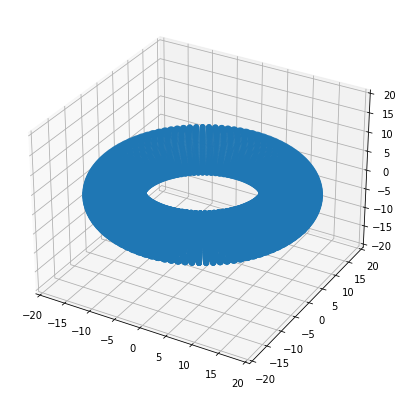

(64, 3)
[[ 2.00000000e+01  0.00000000e+00  0.00000000e+00]
 [ 1.24697960e+01  1.56366296e+01  0.00000000e+00]
 [-4.45041868e+00  1.94985582e+01  0.00000000e+00]
 [-1.80193774e+01  8.67767478e+00  0.00000000e+00]
 [-1.80193774e+01 -8.67767478e+00  0.00000000e+00]
 [-4.45041868e+00 -1.94985582e+01  0.00000000e+00]
 [ 1.24697960e+01 -1.56366296e+01  0.00000000e+00]
 [ 2.00000000e+01 -4.89858720e-15  0.00000000e+00]
 [ 1.81174490e+01  0.00000000e+00  3.90915741e+00]
 [ 1.12960447e+01  1.41647920e+01  3.90915741e+00]
 [-4.03151167e+00  1.76632067e+01  3.90915741e+00]
 [-1.63232575e+01  7.86086652e+00  3.90915741e+00]
 [-1.63232575e+01 -7.86086652e+00  3.90915741e+00]
 [-4.03151167e+00 -1.76632067e+01  3.90915741e+00]
 [ 1.12960447e+01 -1.41647920e+01  3.90915741e+00]
 [ 1.81174490e+01 -4.43749519e-15  3.90915741e+00]
 [ 1.38873953e+01  0.00000000e+00  4.87463956e+00]
 [ 8.65864936e+00  1.08576029e+01  4.87463956e+00]
 [-3.09023618e+00  1.35392093e+01  4.87463956e+00]
 [-1.25121108e+01  6.02

In [80]:
import math
import numpy as np
import matplotlib.pyplot as plt

pi2 = 2 * math.pi
def torus(inner_radius, outer_radius, count_points_in_ring = 100, count_rings = 100):
    radius_cut = (outer_radius - inner_radius) / 2
    return np.array([ get_point(radius_cut, inner_radius + radius_cut, theta, phi) for theta in np.linspace(0, pi2, count_points_in_ring) for phi in np.linspace(0, pi2, count_rings) ])

def get_point(radius_cut, center_distance, theta, phi):
    r = center_distance + radius_cut * math.cos(theta)
    return [ r * math.cos(phi), r * math.sin(phi), radius_cut * math.sin(theta) ]

radius_outer, radius_inner = 20, 10
points = torus(radius_inner, radius_outer)

plt.figure(figsize=(7, 7))
ax = plt.axes(projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.set_xlim3d(-radius_outer, radius_outer)
ax.set_ylim3d(-radius_outer, radius_outer)
ax.set_zlim3d(-radius_outer, radius_outer)
plt.show()

torus_8x8 = torus(radius_inner, radius_outer, count_points_in_ring=8, count_rings=8)
print(torus_8x8.shape)
print(torus_8x8)